In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
dataset = pd.read_csv("Titanic-Dataset.csv")

In [195]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [196]:
df = pd.DataFrame(dataset)

In [197]:
## Checking the presence of null values
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [198]:
## modifiying the existing dataframe directly by giving the null values the median of the age
df['Age'].fillna(df['Age'].median(), inplace = True)

/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_40652/2127950424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace = True)


In [199]:
## we are removing the the Cabin, Name, Ticket, PassengerId column because it is useless for our model
df.drop(['Cabin','Name','Ticket','PassengerId'],axis = 1, inplace = True)

In [200]:
## categorical features are converted into numerical values
# One Hot Encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
embark_dummy = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embark_dummy], axis=1)
df = df.drop('Embarked', axis=1)
df = df.drop('Embarked_S', axis = 1)


In [201]:
df.isnull().sum()
## now there is no null values

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_C    0
Embarked_Q    0
dtype: int64

In [202]:
df.head(10) ## final dataframe

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,22.0,1,0,7.2500,True,False,False
1,1,1,38.0,1,0,71.2833,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,False
3,1,1,35.0,1,0,53.1000,False,False,False
4,0,3,35.0,0,0,8.0500,True,False,False
5,0,3,28.0,0,0,8.4583,True,False,True
6,0,1,54.0,0,0,51.8625,True,False,False
7,0,3,2.0,3,1,21.0750,True,False,False
8,1,3,27.0,0,2,11.1333,False,False,False
9,1,2,14.0,1,0,30.0708,False,True,False


In [203]:
##Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])


In [204]:
df ## final clean dataset

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,0,3,-0.565736,1,0,-0.502445,True,False,False
1,1,1,0.663861,1,0,0.786845,False,True,False
2,1,3,-0.258337,0,0,-0.488854,False,False,False
3,1,1,0.433312,1,0,0.420730,False,False,False
4,0,3,0.433312,0,0,-0.486337,True,False,False
...,...,...,...,...,...,...,...,...,...
886,0,2,-0.181487,0,0,-0.386671,True,False,False
887,1,1,-0.796286,0,0,-0.044381,False,False,False
888,0,3,-0.104637,1,2,-0.176263,False,False,False
889,1,1,-0.258337,0,0,-0.044381,True,True,False


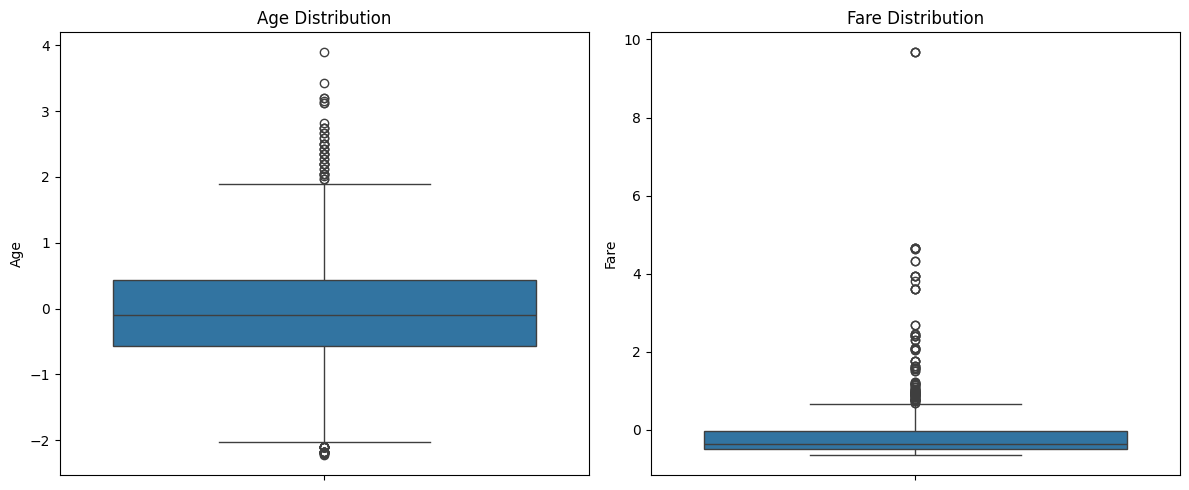

In [205]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y='Age', data=df, ax=axes[0])
axes[0].set_title('Age Distribution')

sns.boxplot(y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare Distribution')

plt.tight_layout()
plt.show()



In [206]:
# For Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Remove Age outliers
df = df[(df['Age'] >= (Q1_age - 1.5 * IQR_age)) & (df['Age'] <= (Q3_age + 1.5 * IQR_age))]

# For Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

# Remove Fare outliers
df = df[(df['Fare'] >= (Q1_fare - 1.5 * IQR_fare)) & (df['Fare'] <= (Q3_fare + 1.5 * IQR_fare))]


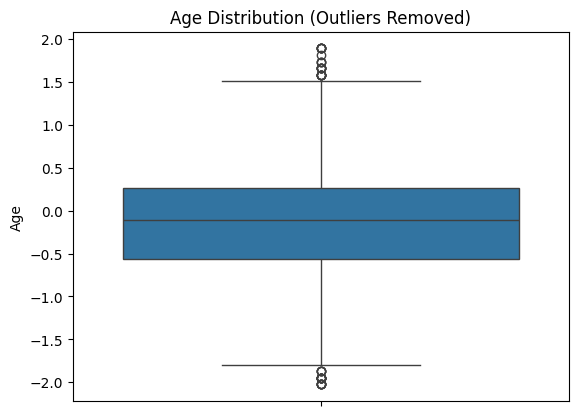

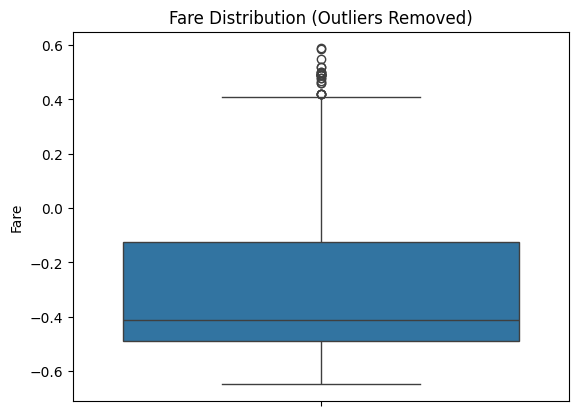

In [207]:
# Cleaned Age
sns.boxplot(y='Age', data=df)
plt.title('Age Distribution (Outliers Removed)')
plt.show()

# Cleaned Fare
sns.boxplot(y='Fare', data=df)
plt.title('Fare Distribution (Outliers Removed)')
plt.show()
